In [5]:
import pandas as pd
df=pd.read_csv("hits.csv",encoding="latin1")
df

,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,0.310,1
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,Jim Wynn,15,1920,6653,1105,1665,285,39,291,964,1224,1427,225,101,0.250,0
461,Jorge Posada,17,1829,6092,900,1664,379,10,275,1065,936,1453,20,21,0.273,0
462,Brady Anderson,15,1834,6499,1062,1661,338,67,210,761,960,1190,315,100,0.256,0
463,Cookie Rojas,16,1822,6309,714,1660,254,25,54,593,396,489,74,68,0.263,0


In [6]:
df.isnull().sum()

PLAYER    0
YRS       0
G         0
AB        0
R         0
H         0
2B        0
3B        0
HR        0
RBI       0
BB        0
SO        0
SB        0
CS        0
BA        0
HOF       0
dtype: int64

In [7]:
df.columns

Index(['PLAYER', 'YRS', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB',
       'SO', 'SB', 'CS', 'BA', 'HOF'],
      dtype='object')

In [8]:
df.drop('PLAYER',axis=1,inplace=True)

In [9]:
df

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1
3,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,0.310,1
4,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,15,1920,6653,1105,1665,285,39,291,964,1224,1427,225,101,0.250,0
461,17,1829,6092,900,1664,379,10,275,1065,936,1453,20,21,0.273,0
462,15,1834,6499,1062,1661,338,67,210,761,960,1190,315,100,0.256,0
463,16,1822,6309,714,1660,254,25,54,593,396,489,74,68,0.263,0


In [12]:
clos=['YRS', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB',
       'SO', 'SB', 'CS', 'BA', 'HOF']

In [13]:
for col in clos :
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers")

YRS: 1 outliers
G: 11 outliers
AB: 13 outliers
R: 11 outliers
H: 13 outliers
2B: 10 outliers
3B: 7 outliers
HR: 5 outliers
RBI: 1 outliers
BB: 12 outliers
SO: 2 outliers
SB: 14 outliers
CS: 10 outliers
BA: 12 outliers
HOF: 0 outliers


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

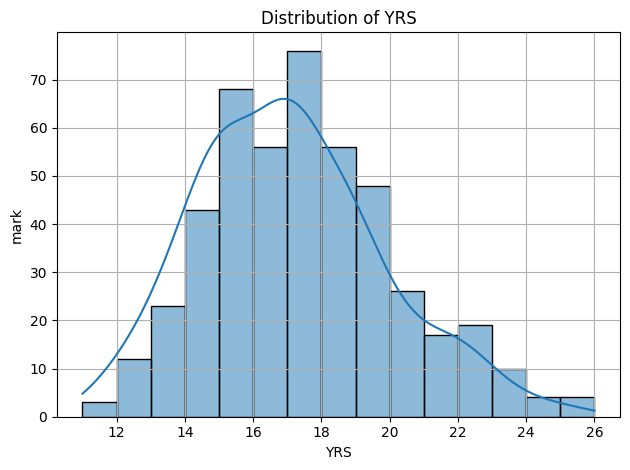

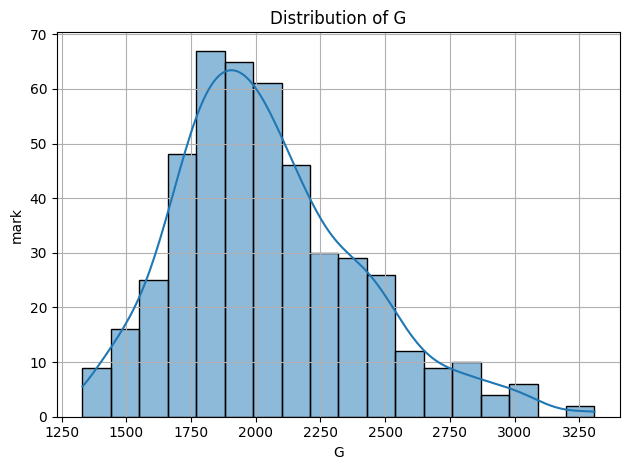

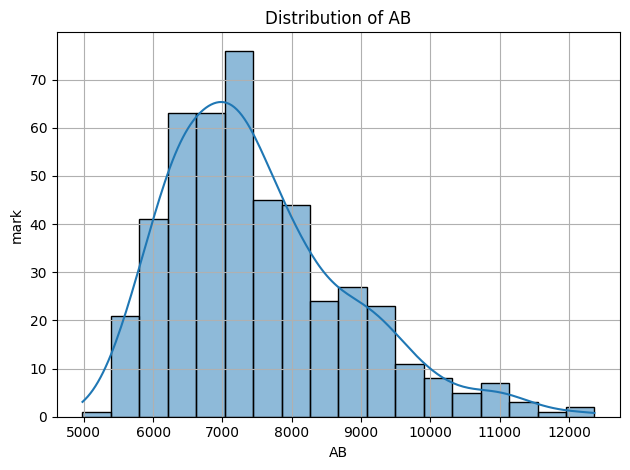

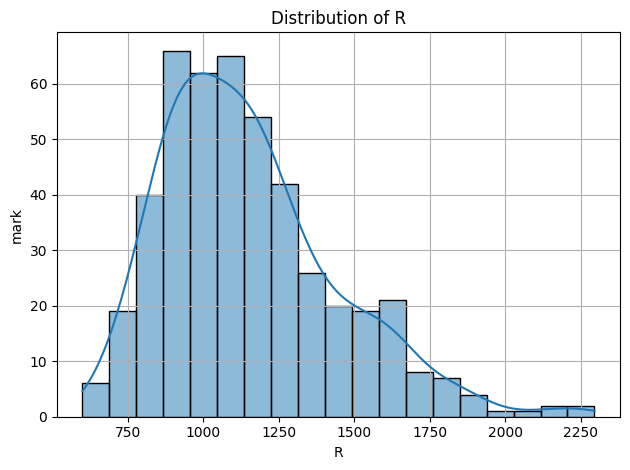

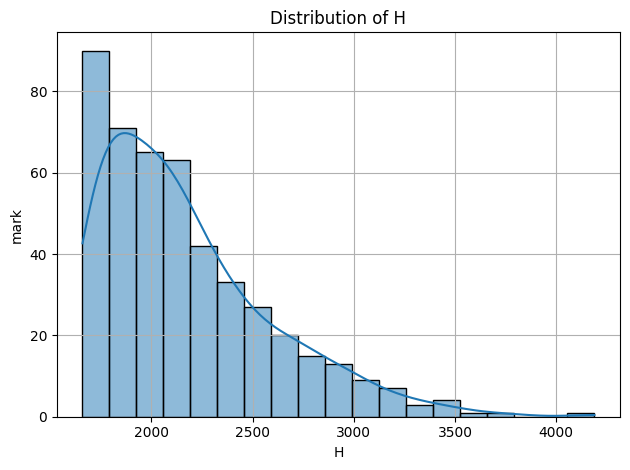

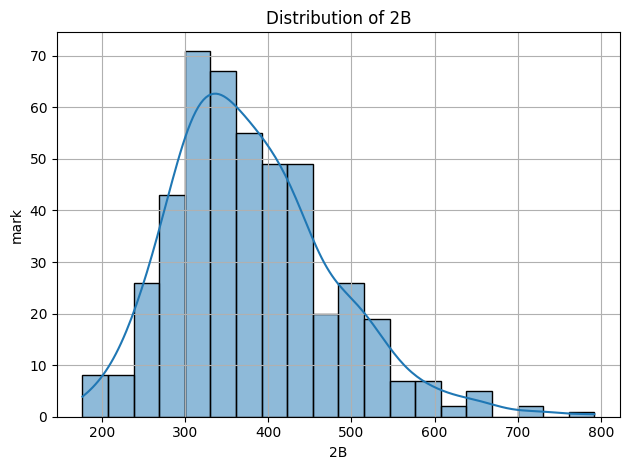

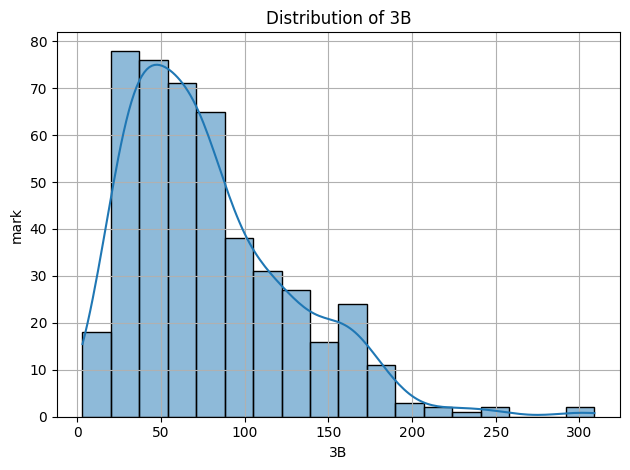

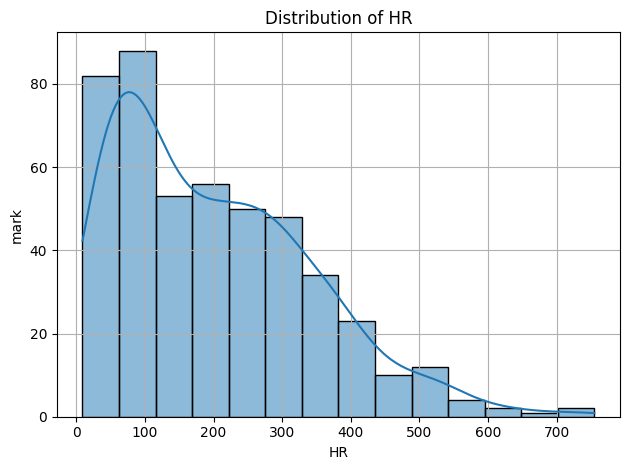

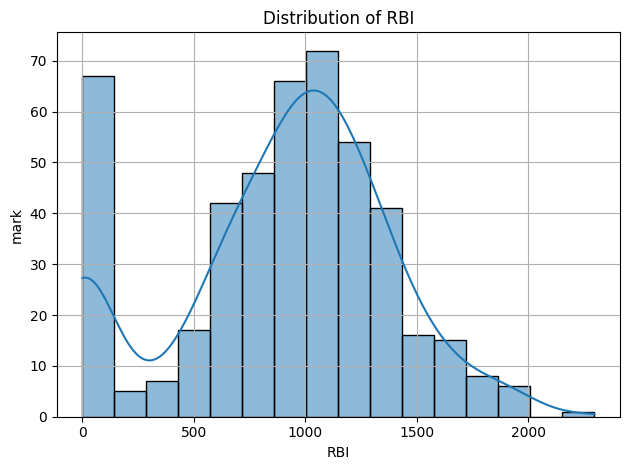

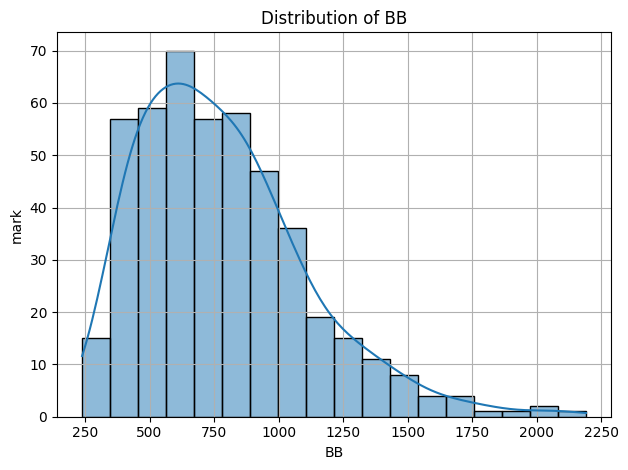

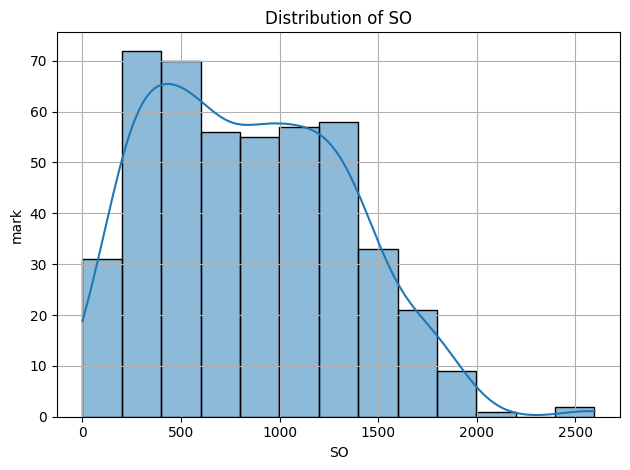

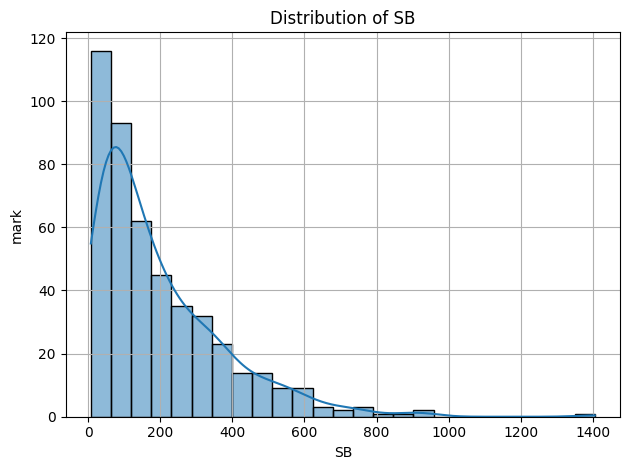

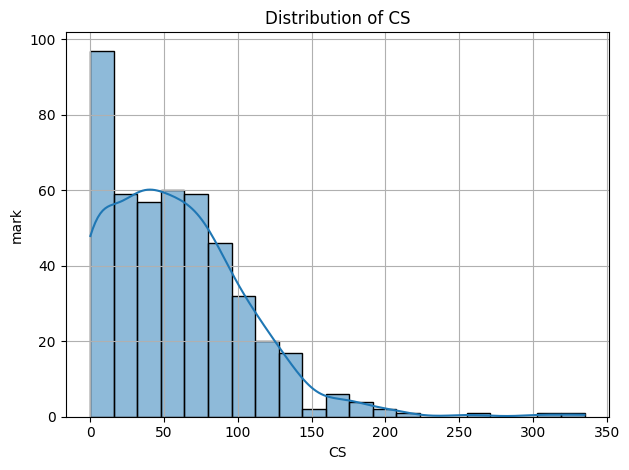

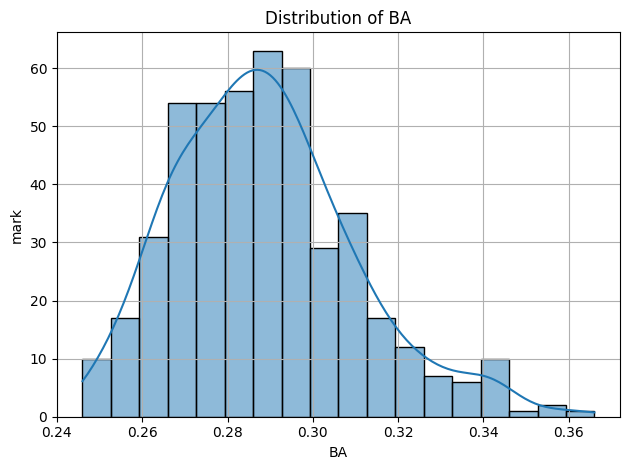

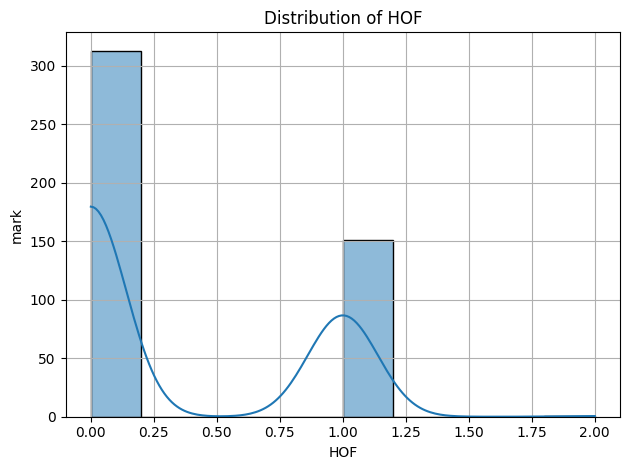

In [15]:
for sj in clos:
    sns.histplot(df[sj],kde=True)
    plt.title(f"Distribution of {sj}")
    plt.xlabel(sj)
    plt.ylabel("mark")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [16]:
for col in clos:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
X=df.drop('HOF',axis=1)
Y=df['HOF']

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [24]:
scaler = StandardScaler()

In [31]:
model = RandomForestClassifier(n_estimators = 12,max_depth=6,random_state=42)

In [32]:
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [33]:
model.fit(X_train_scale, Y_train)

,n_estimators,12
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
Y_pred = model.predict(X_test_scale)

In [35]:
print(accuracy_score(Y_test,Y_pred))

0.9032258064516129
